In [1]:
!pip install folium
!pip install xlrd

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [160]:
# Load your data
df= pd.read_excel(r'C:\Users\Rathn\Documents\MTH Project2\fatal-police-shootings-data.xls')

# Filter out rows where latitude or longitude might be missing
df = df.dropna(subset=['latitude', 'longitude'])

Text(0.5, 1.0, 'Black people Age Distribution')

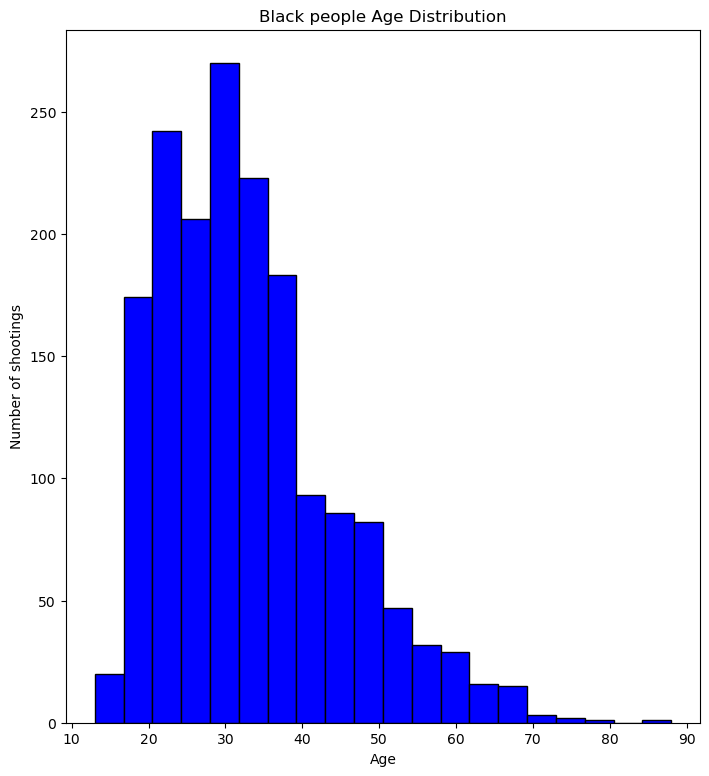

In [178]:
# Filter data for Black and White people
black_people = df[df['race'] == 'B'].dropna(subset=['age'])
white_people = df[df['race'] == 'W'].dropna(subset=['age'])
# Plot histograms for Black and White people's ages
plt.figure(figsize=(18, 9)) # Adjust figure size as needed
plt.subplot(1, 2, 1) # Create the left subplot
plt.hist(black_data['age'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of shootings')
plt.title('Black people Age Distribution')

Text(0.5, 1.0, 'Age Distribution for White People')

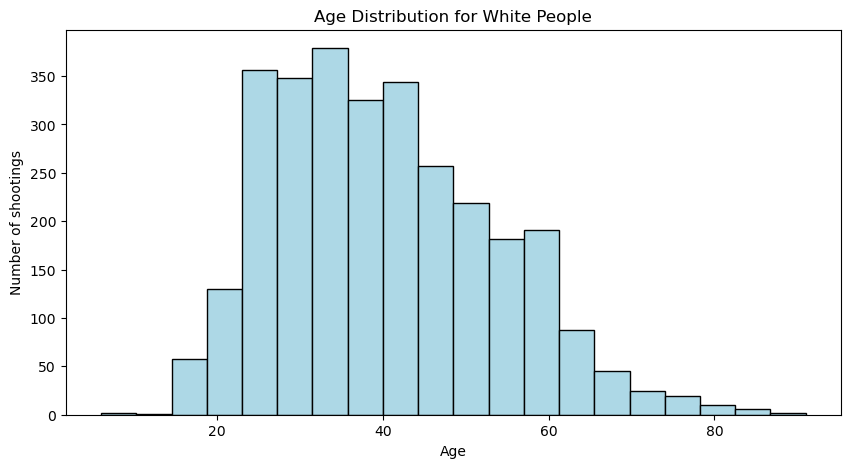

In [182]:
plt.figure(figsize=(22,11))
plt.subplot(2, 2, 3) # Create the right subplot
plt.hist(white_people['age'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of shootings')
plt.title('Age Distribution for White People')

In [183]:
# Calculate the mean age for Black and White people
mean_black_people = black_people['age'].mean()
mean_white_people = white_people['age'].mean()
# Calculate the mean age difference
mean_age_difference = mean_black_people - mean_white_people
# Print the mean ages and mean age difference
print(f"\nMean Age for White People: {mean_white_people:.2f}")
print(f"Mean Age for Black People: {mean_black_people:.2f}")
print(f"Mean Age Difference (White - Black): {mean_age_difference:.2f}")


Mean Age for White People: 40.05
Mean Age for Black People: 32.82
Mean Age Difference (White - Black): -7.23


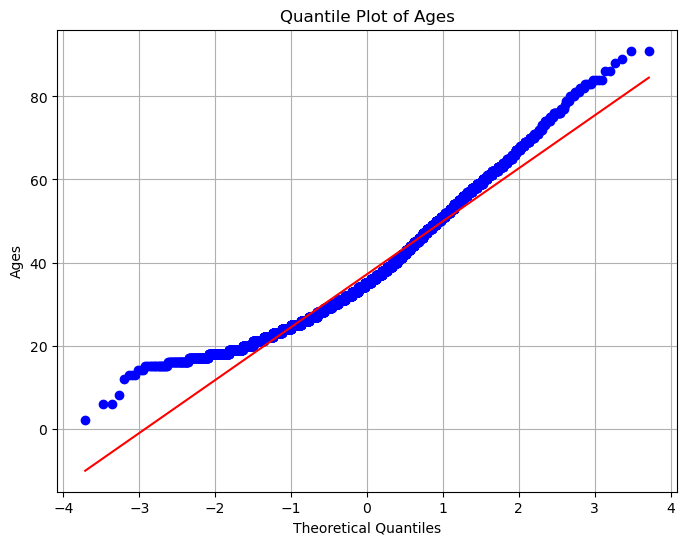

In [184]:
all_ages = df['age'].dropna().tolist()

# Create a quantile plot
plt.figure(figsize=(8, 6))
probplot(all_ages, plot=plt)
plt.title('Quantile Plot of Ages')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ages')
plt.grid(True)
plt.show()

In [185]:
# Top affected states
top_states = df['state'].value_counts().head(10)

# Top affected cities
top_cities = df['city'].value_counts().head(10)

#top affected with armed

armed_with=df['armed'].value_counts().head(10)

#Affected by race

race_with=df['race'].value_counts().head(10)
#affected by Gender

gender_graph=df['gender'].value_counts().head(10)

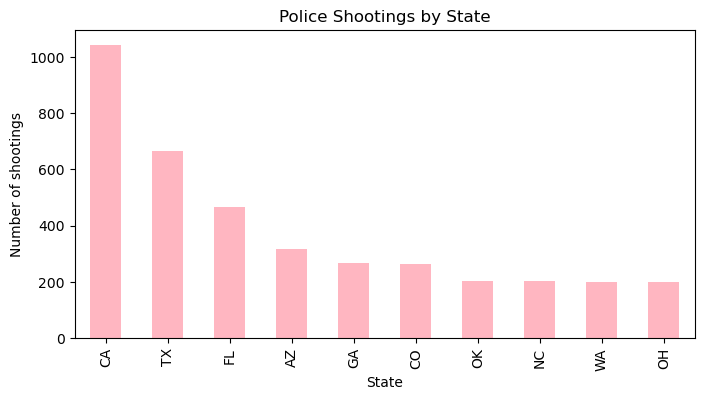

In [189]:
# Plotting the top affected states
plt.figure(figsize=(8, 4))
top_states.plot(kind='bar', color='lightpink')
plt.title('Police Shootings by State')
plt.xlabel('State')
plt.ylabel('Number of shootings')
plt.show()

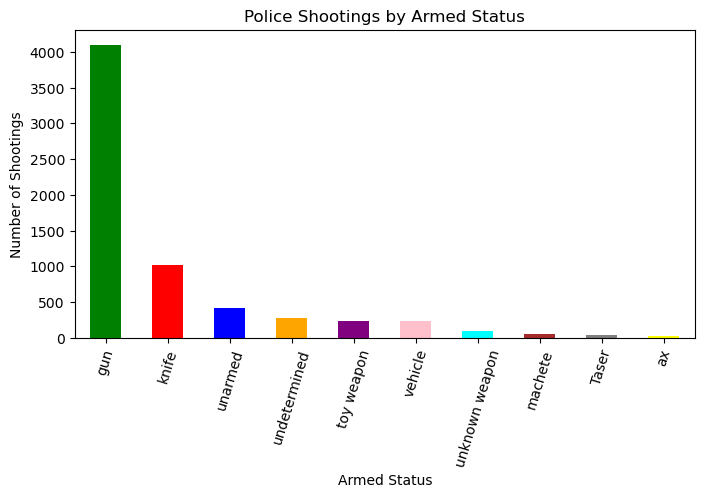

In [190]:
colors = ['green', 'red', 'blue', 'orange', 'purple', 'pink', 'cyan', 'brown', 'grey', 'yellow']

# Plotting the Top 10 armed status
plt.figure(figsize=(8, 4))
armed_with.plot(kind='bar', color=colors)
plt.title('Police Shootings by Armed Status')
plt.xlabel('Armed Status')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=73)
plt.show()

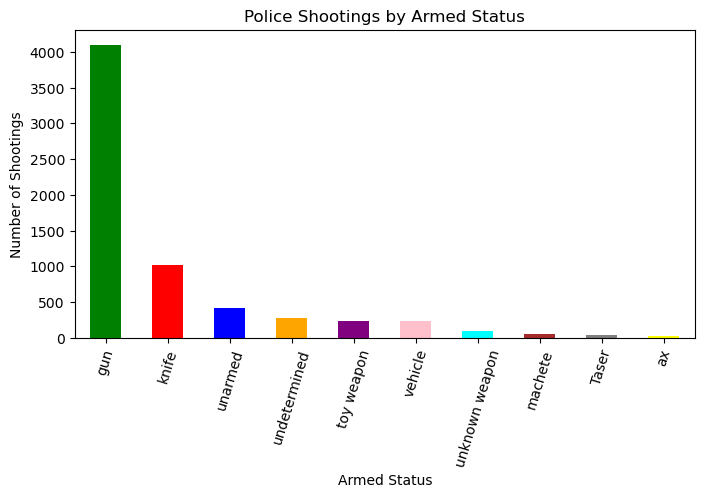

In [191]:

# Plotting the Top 10 armed status
plt.figure(figsize=(8, 4))
armed_with.plot(kind='bar', color=colors)
plt.title('Police Shootings by Armed Status')
plt.xlabel('Armed Status')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=73)
plt.show()

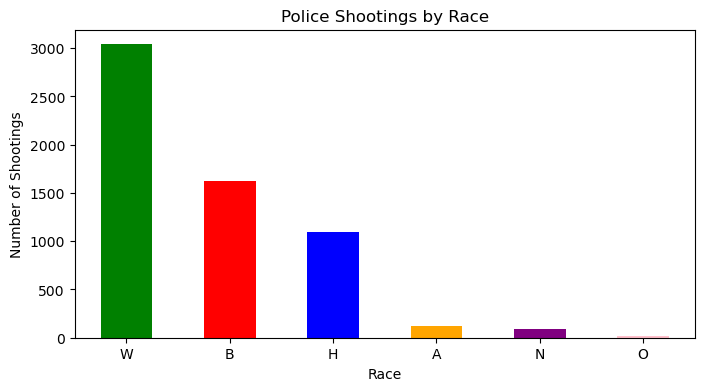

In [192]:
# Plotting the Top 10 armed status
plt.figure(figsize=(8, 4))
race_with.plot(kind='bar', color=colors)
plt.title('Police Shootings by Race')
plt.xlabel('Race')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=360)
plt.show()

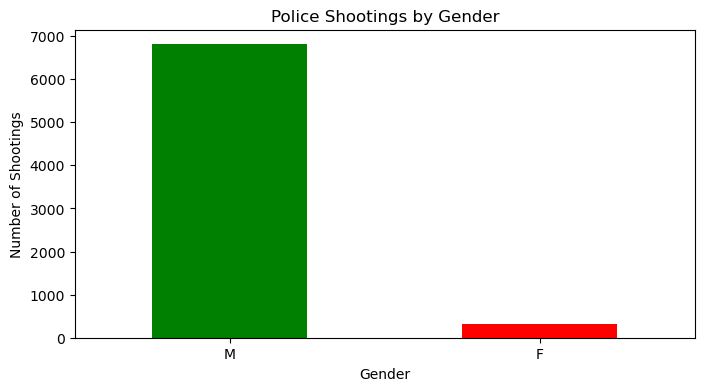

In [193]:
# Plotting the Top 10 armed status
plt.figure(figsize=(8, 4))
gender_graph.plot(kind='bar', color=colors)
plt.title('Police Shootings by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=360)
plt.show()

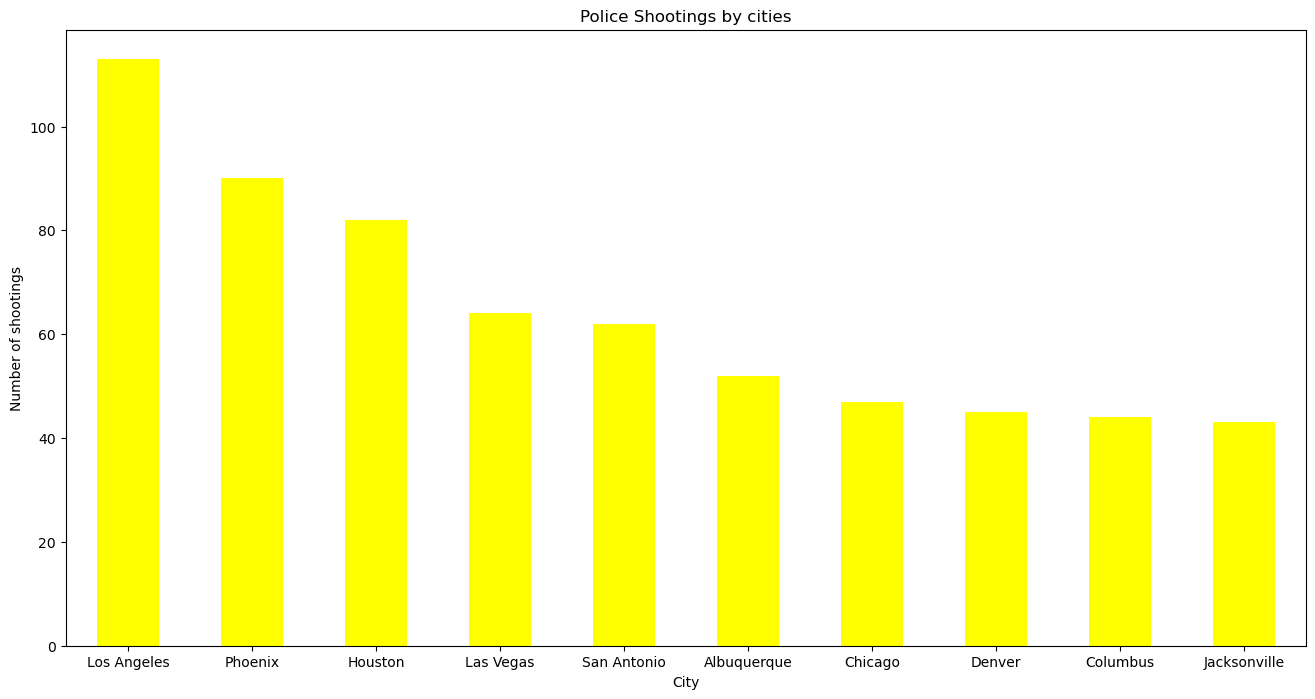

In [194]:
# Plotting the top affected cities
plt.figure(figsize=(16, 8))
top_cities.plot(kind='bar', color='yellow')
plt.title('Police Shootings by cities')
plt.xlabel('City')
plt.ylabel('Number of shootings')
plt.xticks(rotation=0)
plt.show()

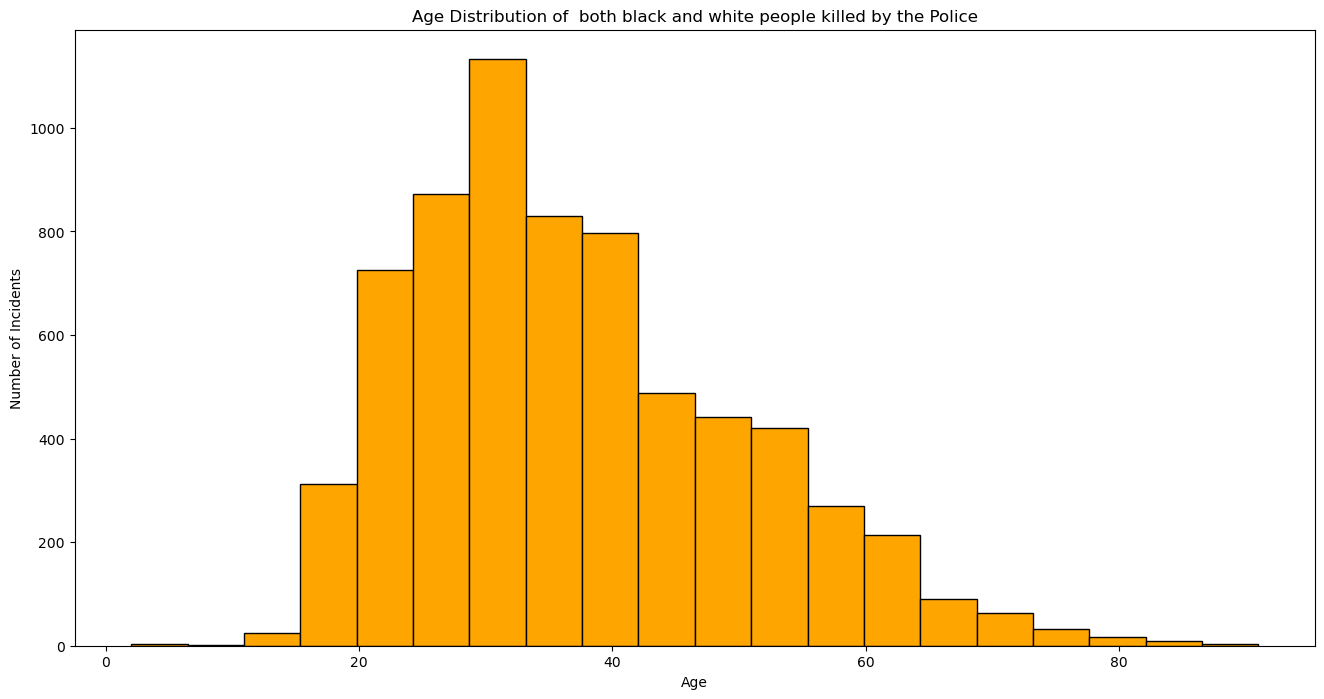

In [195]:
plt.figure(figsize=(16,8))
plt.hist(df['age'].dropna(), bins=20, edgecolor='black', color='orange')
plt.xlabel('Age')
plt.ylabel('Number of Incidents')
plt.title('Age Distribution of  both black and white people killed by the Police')
plt.show()

In [196]:
!pip install cartopy

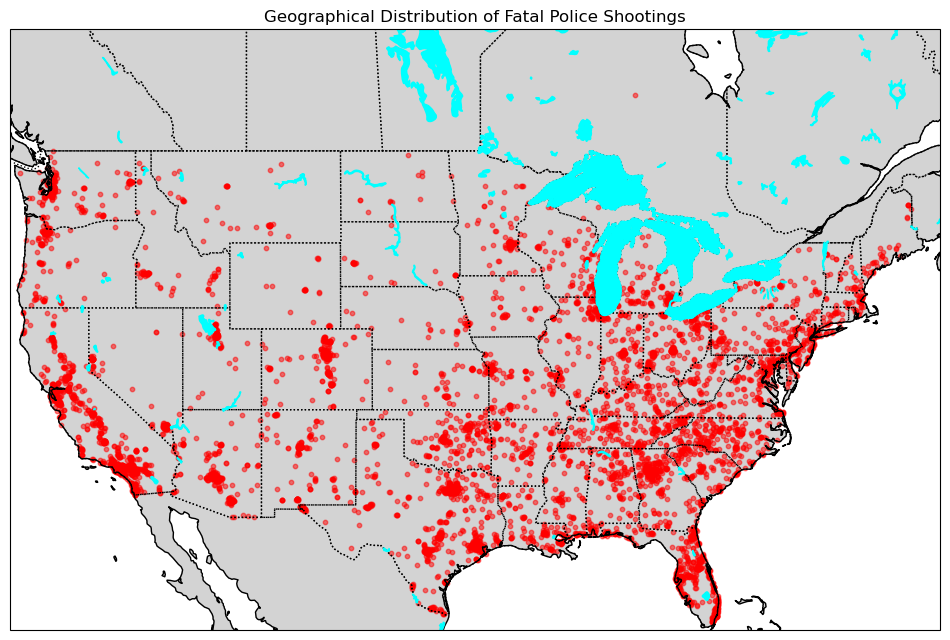

In [197]:



# Create a map
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-125, -66, 25, 50])

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='aqua', facecolor='aqua')

# Plot each point
scatter = ax.scatter(data['longitude'].values, data['latitude'].values, s=10, color='red', marker='o', alpha=0.5, transform=ccrs.PlateCarree())

plt.title('Geographical Distribution of Fatal Police Shootings')
plt.show()



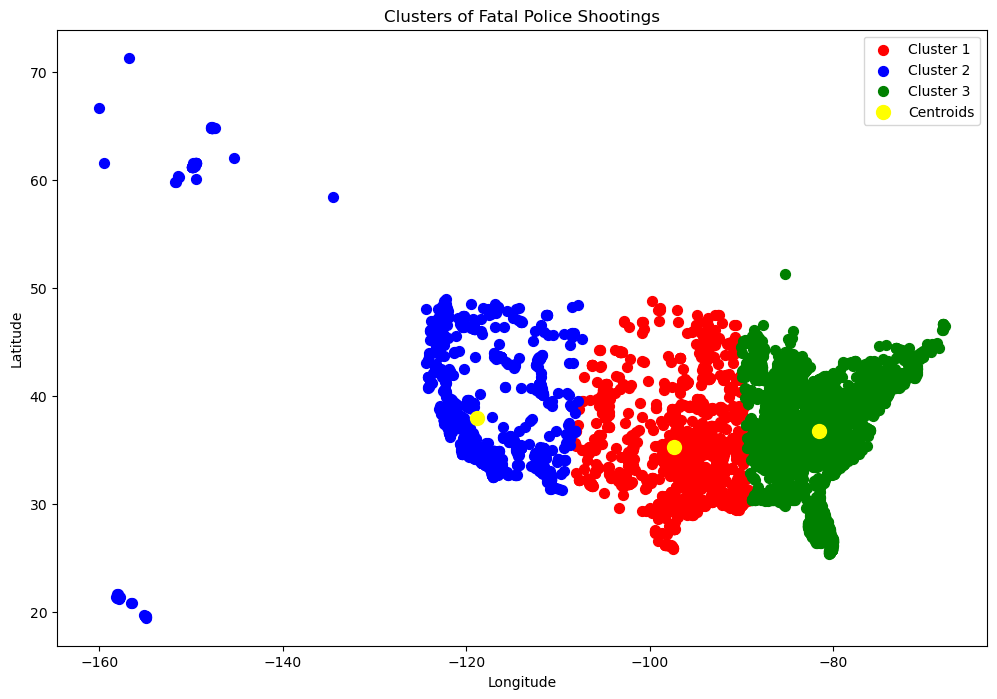

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Remove rows with missing latitude or longitude
cleaned_data = data.dropna(subset=['latitude', 'longitude'])

# Extracting latitude and longitude for clustering
X = cleaned_data[['latitude', 'longitude']]

# Performing K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Adding cluster labels to the dataframe
cleaned_data['cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(cleaned_data[cleaned_data['cluster'] == i]['longitude'], 
                cleaned_data[cleaned_data['cluster'] == i]['latitude'], 
                s=50, c=colors[i], label=f'Cluster {i+1}')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], 
            s=100, c='yellow', label='Centroids')

plt.title('Clusters of Fatal Police Shootings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [211]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'data' is your original dataset
# Remove rows with missing latitude or longitude
cleaned_data = data.dropna(subset=['latitude', 'longitude'])

# Extracting latitude and longitude for clustering
X = cleaned_data[['latitude', 'longitude']]

# Performing DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=10)  # Adjust parameters as needed
cluster_labels = dbscan.fit_predict(X)

# Adding cluster labels to the dataframe
cleaned_data['cluster'] = cluster_labels

# Plotting the clusters on a map using folium
map_center = [cleaned_data['latitude'].mean(), cleaned_data['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=5)

# Plotting each cluster on the map
colors = ['red','blue','green','pink','yellow']
for cluster_label in cleaned_data['cluster'].unique():
    cluster_data = cleaned_data[cleaned_data['cluster'] == cluster_label]
    for index, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=1,
            color=colors[cluster_label % len(colors)],
            fill=True,
            fill_color=colors[cluster_label % len(colors)],
            fill_opacity=0.7,
            popup=f'Cluster: {cluster_label}'
        ).add_to(mymap)

# Save the map as an HTML file
mymap.save('cluster_map.html')

# Display the map using your preferred web browser
import webbrowser
webbrowser.open('cluster_map.html')


True

In [199]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Filter out rows where latitude or longitude is missing
filtered_data = data.dropna(subset=['latitude', 'longitude'])

# Create a basic map centered around the United States
map_center = [39.8283, -98.5795]  # Geographical center of the contiguous United States
basic_map = folium.Map(location=map_center, zoom_start=5)

# Add a marker for each incident to the scatter plot map
for _, row in filtered_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(basic_map)

# Create a HeatMap
heat_map = folium.Map(location=map_center, zoom_start=5)
HeatMap(filtered_data[['latitude', 'longitude']], radius=10).add_to(heat_map)

# Save the maps to HTML files
basic_map.save('fatal_shootings_scatter_plot.html')
heat_map.save('fatal_shootings_heat_map.html')
